In [27]:
import os, shutil
import numpy as np

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16

import matplotlib.pyplot as plt

In [11]:
# original dataset, uncompressed
original_dataset_dir = '/Users/y33-j3T/Downloads/dogs-vs-cats/train/train'

# smaller dataset
base_dir = 'cats_and_dogs'

# directory for training, validation & test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# directory for training pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory for validation pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# directory for testing pictures
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
try:
    os.mkdir(base_dir)
    
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)

    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)

    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)

    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
    
except OSError as e:
    print(e)


In [3]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Let's count how many pictures are in each training split (train / validation / test)

In [4]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


Instantiating a small convnet for dogs vs. cats classification

## Model 1

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Data preprocessing
1. Read picture files
2. Decode JPEG to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale pixel values (0-255) to \[0-1\] interval

In [8]:
# rescale images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # target directory
    target_size=(150, 150),  # resize all images to 150*150
    batch_size=20,
    class_mode='binary')  # need binary labels because binary_crossentropy is used

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,  # number of times to call generator before moving to next epoch
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)  # same concept as step_per_epoch

Epoch 1/30
100/100 [==============================] - 21s 207ms/step - loss: 0.7001 - acc: 0.5140 - val_loss: 0.6806 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6604 - acc: 0.6005 - val_loss: 0.6674 - val_acc: 0.5650
Epoch 3/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6190 - acc: 0.6595 - val_loss: 0.6884 - val_acc: 0.5820
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5854 - acc: 0.6820 - val_loss: 0.6156 - val_acc: 0.6520
Epoch 5/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5398 - acc: 0.7220 - val_loss: 0.6192 - val_acc: 0.6460
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5099 - acc: 0.7455 - val_loss: 0.5836 - val_acc: 0.6810A: 
Epoch 7/30
100/100 [==============================] - 6s 59ms/step - loss: 0.4810 - acc: 0.7665 - val_loss: 0.6046 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 6s 59ms/st

Always save your models after training

In [12]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

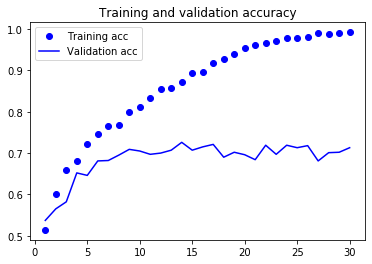

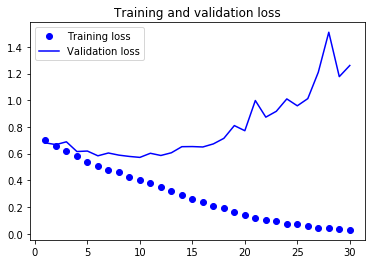

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 2

Use **data augmentation** to counter overfitting
- make more data, "augment" the data so that model sees more samples, and therefore is able to generalize better
- ideally, if a model is able to see all pictures in the world, it would never overfit

In [5]:
# set up data augmentation via ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,  # randomly rotate images in degrees 0-180
    width_shift_range=0.2,  # randomly translate images
    height_shift_range=0.2,
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooming inside pictures
    horizontal_flip=True,  # randomly horizontally flipping images (relevant assuming no horizontal assymetry)
    fill_mode='nearest')  # strategy to fill newly created pixels, which can appear after rotation / shifts

Let's look at augmented images

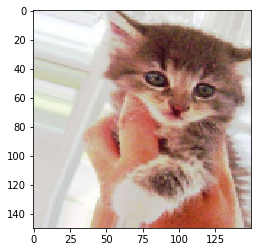

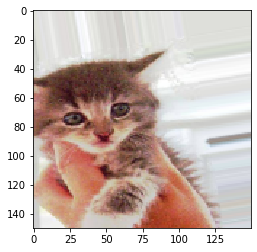

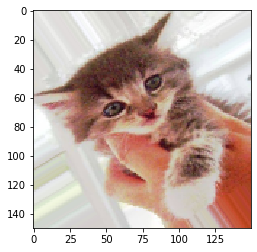

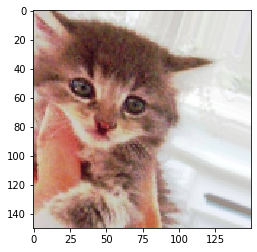

In [23]:
fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]  # select one image to augment

img = image.load_img(img_path, target_size=(150, 150))  # read & resize image

x = image.img_to_array(img)  # convert to numpy array of shape(150, 150, 3)

x = x.reshape((1,) + x.shape)  # reshape x to (1, 150, 150, 3)

# pass the image to datagen to endlessly generate randomly transformed versions
i = 0
for batch in datagen.flow(x, batch_size=1):  
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [24]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [12]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# validation data shouldn't be augmented
test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator2 = test_datagen2.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history2 = model2.fit_generator(train_generator2, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator2, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 34s 342ms/step - loss: 0.6874 - acc: 0.5378 - val_loss: 0.6816 - val_acc: 0.5546
Epoch 2/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6684 - acc: 0.5794 - val_loss: 0.6988 - val_acc: 0.5412
Epoch 3/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6507 - acc: 0.6135 - val_loss: 0.6351 - val_acc: 0.6339
Epoch 4/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6325 - acc: 0.6319 - val_loss: 0.6093 - val_acc: 0.6514
Epoch 5/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6140 - acc: 0.6528 - val_loss: 0.5971 - val_acc: 0.6688
Epoch 6/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6033 - acc: 0.6694 - val_loss: 0.5823 - val_acc: 0.6817
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.5867 - acc: 0.6903 -

100/100 [==============================] - 19s 188ms/step - loss: 0.4099 - acc: 0.8188 - val_loss: 0.4149 - val_acc: 0.8008
Epoch 61/100
100/100 [==============================] - 19s 190ms/step - loss: 0.4117 - acc: 0.8131 - val_loss: 0.4544 - val_acc: 0.7977
Epoch 62/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4042 - acc: 0.8228 - val_loss: 0.4707 - val_acc: 0.7862
Epoch 63/100
100/100 [==============================] - 21s 208ms/step - loss: 0.4026 - acc: 0.8153 - val_loss: 0.4717 - val_acc: 0.7854
Epoch 64/100
100/100 [==============================] - 21s 214ms/step - loss: 0.3975 - acc: 0.8175 - val_loss: 0.4569 - val_acc: 0.7899
Epoch 65/100
100/100 [==============================] - 27s 266ms/step - loss: 0.3868 - acc: 0.8253 - val_loss: 0.4844 - val_acc: 0.7874
Epoch 66/100
100/100 [==============================] - 22s 222ms/step - loss: 0.3871 - acc: 0.8194 - val_loss: 0.4337 - val_acc: 0.7996
Epoch 67/100
100/100 [==============================] 

In [14]:
model2.save('cats_and_dogs_small_2.h5')

In [20]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc2) + 1)

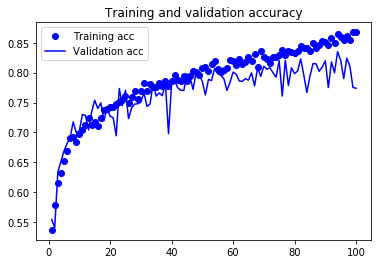

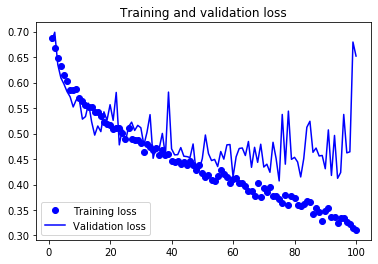

In [21]:
plt.plot(epochs, acc2, 'bo', label='Training acc')
plt.plot(epochs, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss2, 'bo', label='Training loss')
plt.plot(epochs, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 3
Use a pre-trained model - VGG16

How to use?
1. Take the *convolutional base* of VGG16 to extract features from cat and dog images
2. Train a new dogs vs. cats classifier on top of these features

In [25]:
# Instantiate VGG16 convolutional base
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(150, 150, 3))

# `weights` - weights to initialize model with
# `include_top` - whether to include the default classifier (1000 classes from ImageNet), in this case, we intend to use our own classifier (2 classes: cat & dog)
# `input_shape`(optional) - shape of image tensors to feed

58892288/58889256 [==============================] - 20s 0us/step


In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

There are 2 ways to go from here:
1. Run the convolutional base over our dataset, record its output, then use output to train our classifier
2. Extend our classifier on top of the convolutional base, then run the whole thing

Pros & Cons: \
Method 1 does not allow data augmentation but runs fast and cheap. \
Method 2 allows data augmentation but is far more expensive.

### Method 1: Fast feature extraction w/o data augmentation

In [32]:
datagen2 = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen2.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # transform the input to feature
        
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features, labels

In [33]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Features are currently of shape (samples, 4, 4, 512). We'll feed them to a classifier.

First, we flatten them to (samples, 8192)

In [35]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Then, we define our classifier and train it on the data and labels we recorded

In [37]:
model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model3.compile(optimizer=optimizers.RMSprop(lr=2e-5),
               loss='binary_crossentropy',
               metrics=['acc'])

In [39]:
history3 = model3.fit(train_features, train_labels,
                      epochs=30,
                      batch_size=20,
                      validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 517us/step - loss: 0.6015 - acc: 0.6755 - val_loss: 0.4442 - val_acc: 0.8270
Epoch 2/30
2000/2000 [==============================] - 1s 365us/step - loss: 0.4300 - acc: 0.8060 - val_loss: 0.3613 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 1s 365us/step - loss: 0.3557 - acc: 0.8500 - val_loss: 0.3181 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 1s 364us/step - loss: 0.3149 - acc: 0.8725 - val_loss: 0.3004 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 1s 364us/step - loss: 0.2812 - acc: 0.8810 - val_loss: 0.2815 - val_acc: 0.8930
Epoch 6/30
2000/2000 [==============================] - 1s 364us/step - loss: 0.2696 - acc: 0.8905 - val_loss: 0.2750 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 363us/step - loss: 0.2414 - acc: 0.9110 - val_loss: 0.2643 - val_acc: 0.8880
